In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

(2448, 3264, 3)


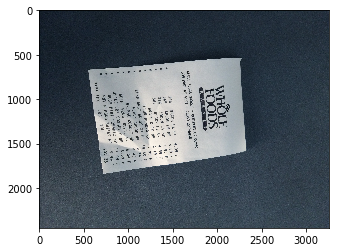

(816, 1088, 3)


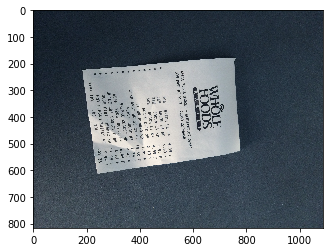

In [2]:
im_path = './receipt.jpg'
img = cv2.imread(im_path)
print (img.shape)
plt.imshow(img)
plt.show()
img = cv2.resize(img, (1088, 816))
print (img.shape)
plt.imshow(img)
plt.show()

## Image Blurring


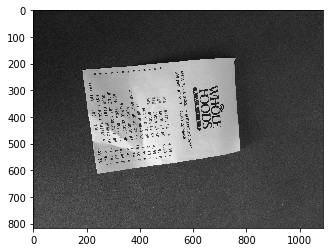

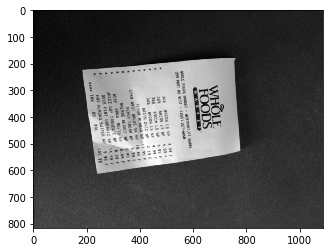

(816, 1088)


In [3]:
orig = img.copy()
gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')
plt.show()
blurred = cv2.GaussianBlur(gray, (5,5), 0)
plt.imshow(blurred,cmap = 'gray')
plt.show()
print (blurred.shape)

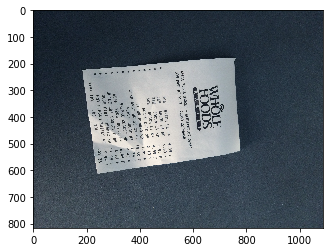

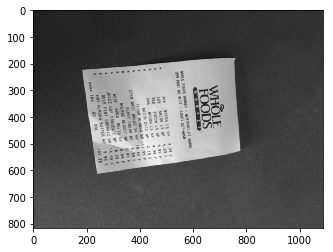

In [4]:
regen = cv2.cvtColor(blurred,cv2.COLOR_GRAY2BGR)
plt.imshow(orig)
plt.show()
plt.imshow(regen)
plt.show()

## Edge Detection


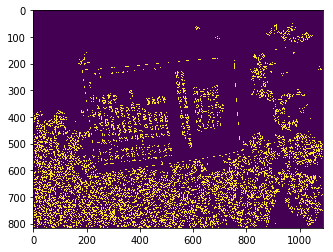

In [5]:
edged = cv2.Canny(blurred, 0, 50)
orig_edged = edged.copy()

plt.imshow(orig_edged)
plt.show()

## Contour Extraction


In [6]:

_, contours, _ = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(len(contours))
contours = sorted(contours, reverse=True, key=cv2.contourArea)

3272


## Best contour selection


In [7]:
for c in contours:
    p = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02*p, True)
    
    if len(approx) == 4:
        target = approx
        break

print (target.shape)

(4, 1, 2)


## Reorder target contour

In [8]:
def reorder(h):
    h = h.reshape((4,2))
    print (h)
    
    hnew = np.zeros((4,2), dtype=np.float32)
    
    add = h.sum(axis=1)
    hnew[3] = h[np.argmin(add)]
    hnew[1] = h[np.argmax(add)]
    
    diff = np.diff(h, axis=1)
    hnew[0] = h[np.argmin(diff)]
    hnew[2] = h[np.argmax(diff)]
    
    return hnew

In [9]:
reorderd = reorder(target)
print ('----------')
print (reorderd)

[[760 180]
 [185 223]
 [241 613]
 [775 527]]
----------
[[760. 180.]
 [775. 527.]
 [241. 613.]
 [185. 223.]]


## Projection to fixed size screen

In [10]:
input_represent = reorderd
output_map = np.float32([[0,0],[800,0],[800,800],[0,800]])

In [11]:
M = cv2.getPerspectiveTransform(input_represent, output_map)
ans = cv2.warpPerspective(orig, M, (800,800))

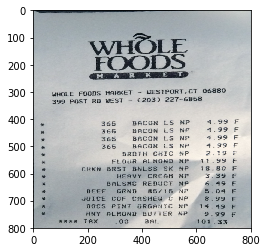

In [12]:
plt.imshow(ans)
plt.show()

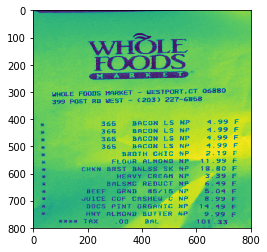

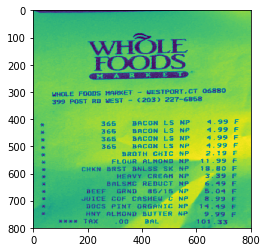

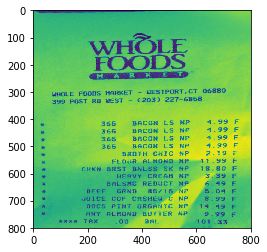

In [13]:
ans2 = cv2.cvtColor(ans, cv2.COLOR_BGR2GRAY)
temp = cv2.GaussianBlur(ans2, (3,3), 0)
temp2 = cv2.GaussianBlur(ans2, (5,5), 0)
temp3 = cv2.GaussianBlur(ans2, (1,1), 0)
plt.imshow(temp)
plt.show()

plt.imshow(temp2)
plt.show()

plt.imshow(temp3)
plt.show()

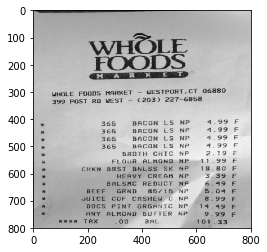

In [14]:
now = cv2.cvtColor(temp, cv2.COLOR_GRAY2BGR)
plt.imshow(now)
plt.show()